<a href="https://colab.research.google.com/github/Nzau1/30_sec-projects/blob/main/IQ_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Student Assessment System ===
1. Conduct New Assessment
2. View Class Distribution
3. Save Data
4. Load Data
5. Exit

Enter your choice (1-5): 1

=== Student Assessment Survey ===

Enter student name: ANTONY NZAU
Enter student age: 23

=== IQ Assessment ===

Logical Questions:

Q1. Complete the sequence: 2, 4, 8, 16, __
1. 24
2. 32
3. 30
4. 28
Enter your answer number: 2

Q2. If all Zorks are Yorks, and no Yorks are Xorks, then:
1. All Zorks are Xorks
2. No Zorks are Xorks
3. Some Zorks are Xorks
4. Cannot determine
Enter your answer number: 2

Mathematical Questions:

Q1. If 3x + 7 = 22, what is x?
1. 5
2. 6
3. 4
4. 3
Enter your answer number: 3

Spatial Questions:

Q1. Which shape would complete the pattern? [Square, Triangle, Square, Triangle, __]
1. Circle
2. Square
3. Triangle
4. Rectangle
Enter your answer number: 2

=== EQ Assessment ===

Self_Awareness Questions:

Q1. How well do you understand your own emotions?
1. Not at all
2. Slightly
3. Moderately
4. Very well
5. Extr

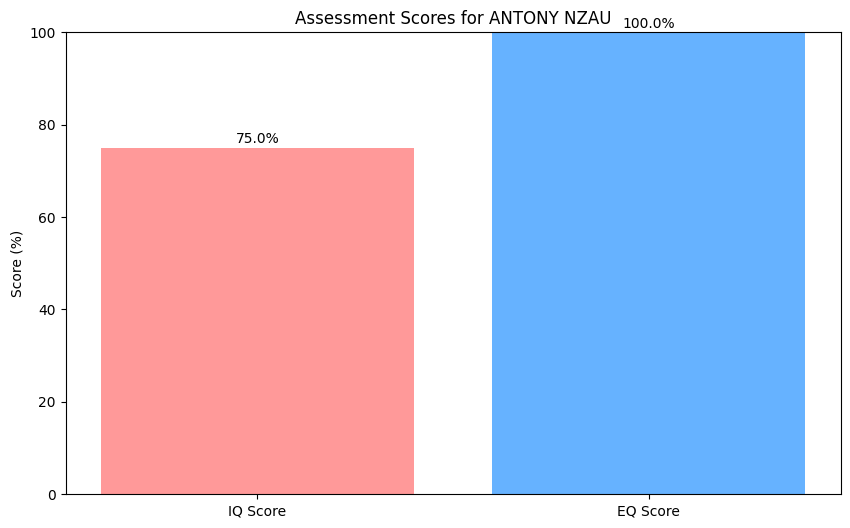


=== Student Assessment System ===
1. Conduct New Assessment
2. View Class Distribution
3. Save Data
4. Load Data
5. Exit

Enter your choice (1-5): 1

=== Student Assessment Survey ===

Enter student name: EVANS NDERO
Enter student age: 20

=== IQ Assessment ===

Logical Questions:

Q1. Complete the sequence: 2, 4, 8, 16, __
1. 24
2. 32
3. 30
4. 28
Enter your answer number: 2

Q2. If all Zorks are Yorks, and no Yorks are Xorks, then:
1. All Zorks are Xorks
2. No Zorks are Xorks
3. Some Zorks are Xorks
4. Cannot determine
Enter your answer number: 4

Mathematical Questions:

Q1. If 3x + 7 = 22, what is x?
1. 5
2. 6
3. 4
4. 3
Enter your answer number: 1

Spatial Questions:

Q1. Which shape would complete the pattern? [Square, Triangle, Square, Triangle, __]
1. Circle
2. Square
3. Triangle
4. Rectangle
Enter your answer number: 2

=== EQ Assessment ===

Self_Awareness Questions:

Q1. How well do you understand your own emotions?
1. Not at all
2. Slightly
3. Moderately
4. Very well
5. Extr

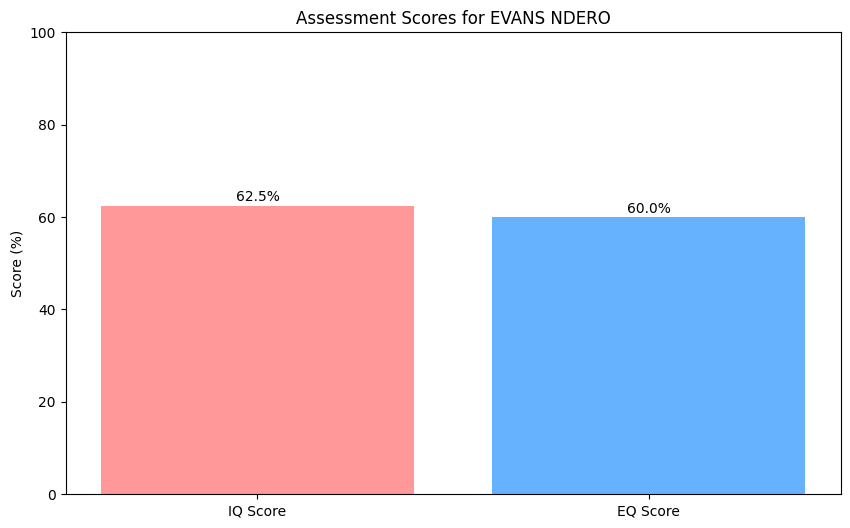


=== Student Assessment System ===
1. Conduct New Assessment
2. View Class Distribution
3. Save Data
4. Load Data
5. Exit

Enter your choice (1-5): 2


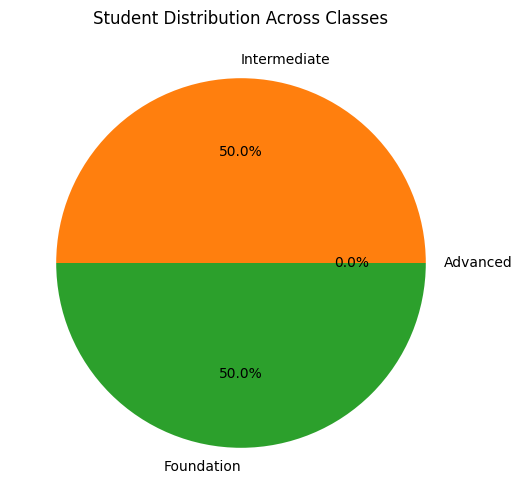


=== Student Assessment System ===
1. Conduct New Assessment
2. View Class Distribution
3. Save Data
4. Load Data
5. Exit


KeyboardInterrupt: Interrupted by user


Enter your choice (1-5): 5


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from datetime import datetime
import pickle
import json

class StudentAssessmentSystem:
    def __init__(self):
        # IQ questions with correct answers and difficulty levels (1-5)
        self.iq_questions = {
            'logical': [
                {
                    'question': 'Complete the sequence: 2, 4, 8, 16, __',
                    'options': ['24', '32', '30', '28'],
                    'correct': '32',
                    'difficulty': 2
                },
                {
                    'question': 'If all Zorks are Yorks, and no Yorks are Xorks, then:',
                    'options': [
                        'All Zorks are Xorks',
                        'No Zorks are Xorks',
                        'Some Zorks are Xorks',
                        'Cannot determine'
                    ],
                    'correct': 'No Zorks are Xorks',
                    'difficulty': 3
                }
            ],
            'mathematical': [
                {
                    'question': 'If 3x + 7 = 22, what is x?',
                    'options': ['5', '6', '4', '3'],
                    'correct': '5',
                    'difficulty': 2
                }
            ],
            'spatial': [
                {
                    'question': 'Which shape would complete the pattern? [Square, Triangle, Square, Triangle, __]',
                    'options': ['Circle', 'Square', 'Triangle', 'Rectangle'],
                    'correct': 'Square',
                    'difficulty': 1
                }
            ]
        }

        # EQ questions with scoring guidelines (1-5 scale)
        self.eq_questions = {
            'self_awareness': [
                {
                    'question': 'How well do you understand your own emotions?',
                    'options': ['Not at all', 'Slightly', 'Moderately', 'Very well', 'Extremely well'],
                    'weight': 1
                }
            ],
            'empathy': [
                {
                    'question': 'How often do you consider others\' feelings before speaking?',
                    'options': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
                    'weight': 1
                }
            ],
            'social_skills': [
                {
                    'question': 'How comfortable are you working in teams?',
                    'options': ['Very uncomfortable', 'Uncomfortable', 'Neutral', 'Comfortable', 'Very comfortable'],
                    'weight': 1
                }
            ]
        }

        self.class_levels = {
            'Advanced': {'iq_range': (80, 100), 'eq_range': (80, 100)},
            'Intermediate': {'iq_range': (60, 79), 'eq_range': (60, 79)},
            'Foundation': {'iq_range': (0, 59), 'eq_range': (0, 59)}
        }

        self.scaler = MinMaxScaler(feature_range=(0, 100))
        self.students_data = []

    def conduct_survey(self):
        """Conducts the IQ and EQ assessment survey for a student"""
        print("\n=== Student Assessment Survey ===\n")

        # Collect student info
        student_info = {
            'id': len(self.students_data) + 1,
            'name': input("Enter student name: "),
            'age': int(input("Enter student age: ")),
            'date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            'iq_responses': [],
            'eq_responses': []
        }

        # IQ Assessment
        print("\n=== IQ Assessment ===")
        iq_score = 0
        max_iq_score = 0

        for category, questions in self.iq_questions.items():
            print(f"\n{category.title()} Questions:")
            for i, q in enumerate(questions, 1):
                print(f"\nQ{i}. {q['question']}")
                for j, option in enumerate(q['options'], 1):
                    print(f"{j}. {option}")

                answer = input("Enter your answer number: ")
                selected_answer = q['options'][int(answer)-1]
                student_info['iq_responses'].append({
                    'question': q['question'],
                    'answer': selected_answer,
                    'correct': selected_answer == q['correct']
                })

                if selected_answer == q['correct']:
                    iq_score += q['difficulty']
                max_iq_score += q['difficulty']

        # EQ Assessment
        print("\n=== EQ Assessment ===")
        eq_score = 0
        max_eq_score = 0

        for category, questions in self.eq_questions.items():
            print(f"\n{category.title()} Questions:")
            for i, q in enumerate(questions, 1):
                print(f"\nQ{i}. {q['question']}")
                for j, option in enumerate(q['options'], 1):
                    print(f"{j}. {option}")

                answer = int(input("Enter your answer number: "))
                student_info['eq_responses'].append({
                    'question': q['question'],
                    'answer': q['options'][answer-1],
                    'score': answer * q['weight']
                })

                eq_score += answer * q['weight']
                max_eq_score += 5 * q['weight']  # Maximum possible score

        # Calculate normalized scores
        student_info['iq_score'] = (iq_score / max_iq_score) * 100
        student_info['eq_score'] = (eq_score / max_eq_score) * 100

        # Determine class placement
        student_info['class_placement'] = self.determine_class(
            student_info['iq_score'],
            student_info['eq_score']
        )

        self.students_data.append(student_info)
        return student_info

    def determine_class(self, iq_score, eq_score):
        """Determines appropriate class based on IQ and EQ scores"""
        for level, ranges in self.class_levels.items():
            if (ranges['iq_range'][0] <= iq_score <= ranges['iq_range'][1] and
                ranges['eq_range'][0] <= eq_score <= ranges['eq_range'][1]):
                return level
        return 'Foundation'  # Default placement

    def generate_report(self, student_info):
        """Generates a detailed report for a student"""
        print("\n=== Student Assessment Report ===")
        print(f"Name: {student_info['name']}")
        print(f"Age: {student_info['age']}")
        print(f"Date: {student_info['date']}")
        print(f"\nIQ Score: {student_info['iq_score']:.2f}%")
        print(f"EQ Score: {student_info['eq_score']:.2f}%")
        print(f"Class Placement: {student_info['class_placement']}")

        # Create visualization
        plt.figure(figsize=(10, 6))
        scores = [student_info['iq_score'], student_info['eq_score']]
        labels = ['IQ Score', 'EQ Score']
        colors = ['#FF9999', '#66B2FF']

        plt.bar(labels, scores, color=colors)
        plt.ylim(0, 100)
        plt.title(f"Assessment Scores for {student_info['name']}")
        plt.ylabel('Score (%)')

        for i, score in enumerate(scores):
            plt.text(i, score + 1, f'{score:.1f}%', ha='center')

        plt.show()

    def save_data(self, filename='student_data.pkl'):
        """Saves the assessment data to a file"""
        with open(filename, 'wb') as f:
            pickle.dump(self.students_data, f)

    def load_data(self, filename='student_data.pkl'):
        """Loads the assessment data from a file"""
        try:
            with open(filename, 'rb') as f:
                self.students_data = pickle.load(f)
        except FileNotFoundError:
            print("No existing data file found.")

    def analyze_class_distribution(self):
        """Analyzes and visualizes the distribution of students across classes"""
        if not self.students_data:
            print("No student data available for analysis.")
            return

        class_counts = {'Advanced': 0, 'Intermediate': 0, 'Foundation': 0}
        for student in self.students_data:
            class_counts[student['class_placement']] += 1

        plt.figure(figsize=(10, 6))
        plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%')
        plt.title('Student Distribution Across Classes')
        plt.show()

# Example usage in Google Colab
def main():
    system = StudentAssessmentSystem()

    while True:
        print("\n=== Student Assessment System ===")
        print("1. Conduct New Assessment")
        print("2. View Class Distribution")
        print("3. Save Data")
        print("4. Load Data")
        print("5. Exit")

        choice = input("\nEnter your choice (1-5): ")

        if choice == '1':
            student_info = system.conduct_survey()
            system.generate_report(student_info)
        elif choice == '2':
            system.analyze_class_distribution()
        elif choice == '3':
            system.save_data()
            print("Data saved successfully!")
        elif choice == '4':
            system.load_data()
            print("Data loaded successfully!")
        elif choice == '5':
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()